In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DL AND CNN se disease/ leaf ki photo dekhkar early blight and late blight identify krna.

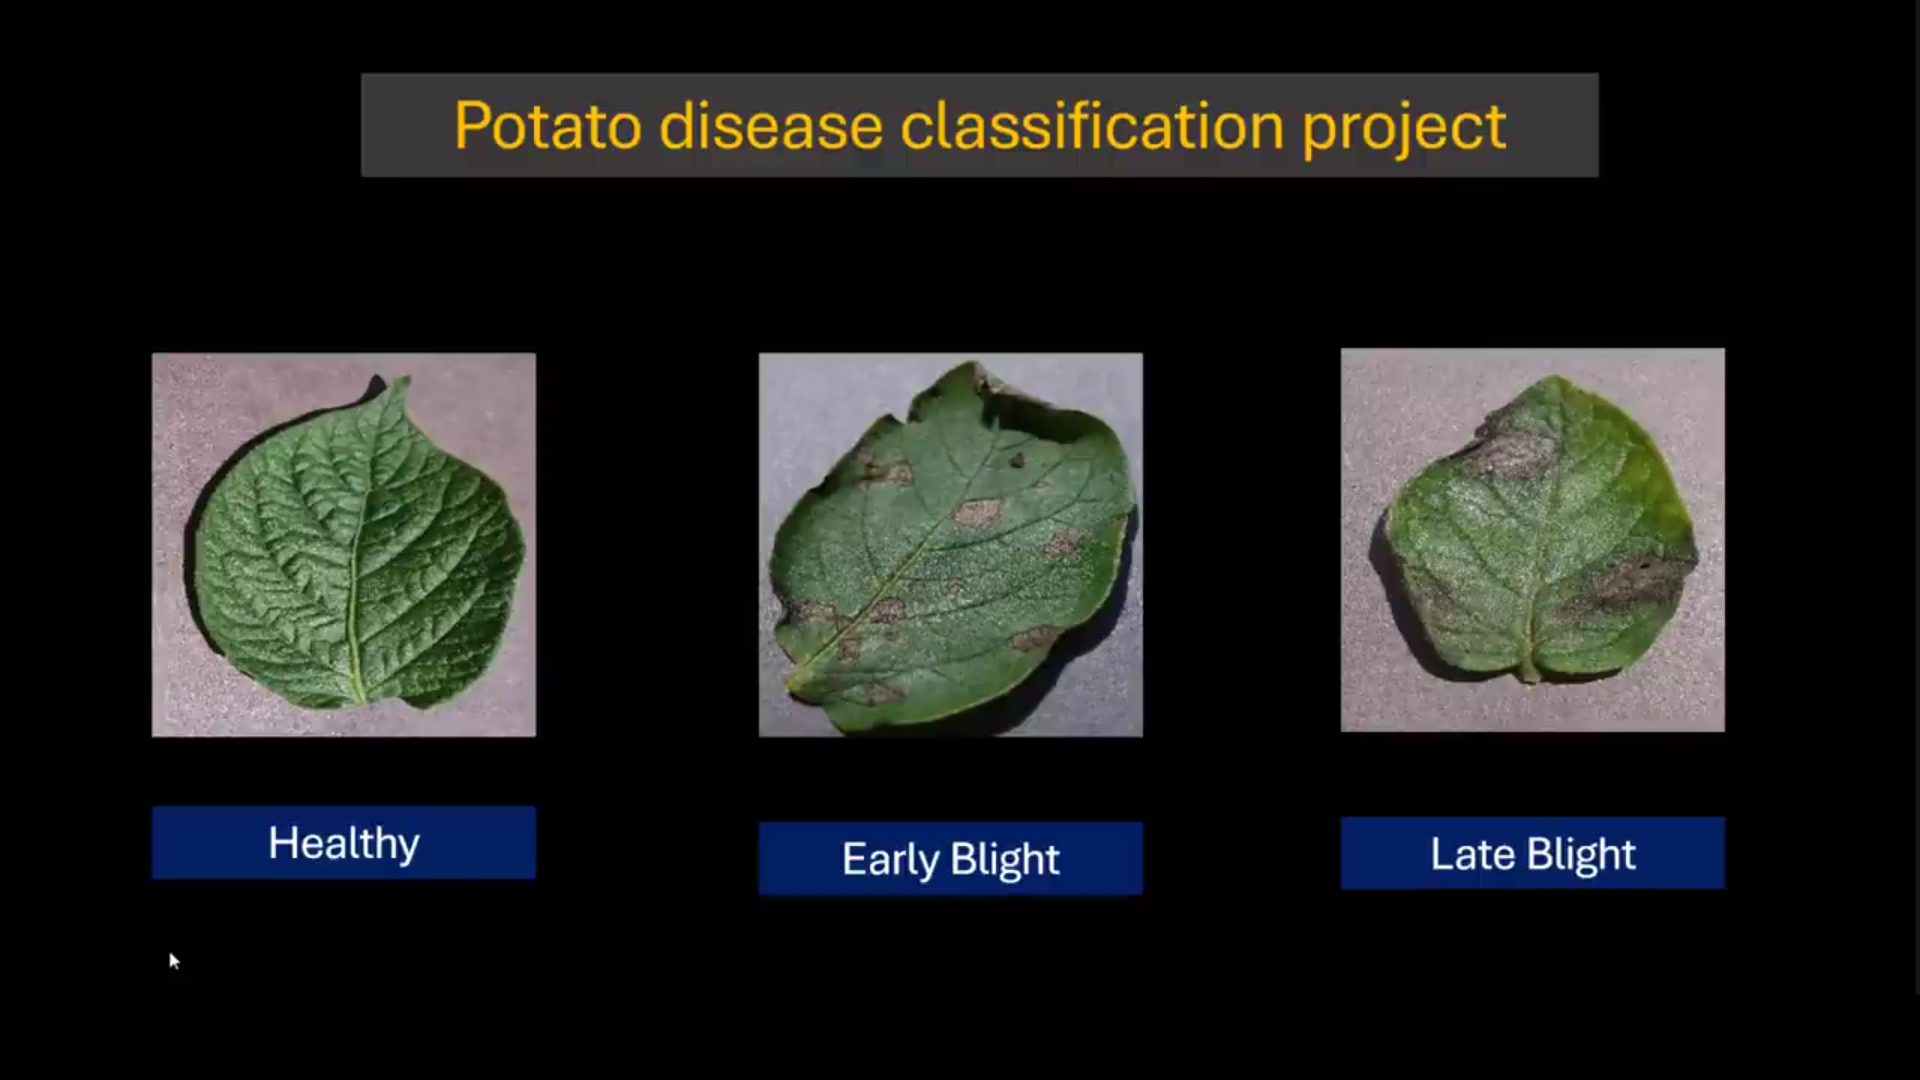

The differences between **healthy**, **potato blight**, and **potato late blight** diseased leaves can be observed visually in their appearance, which is affected by the progression of the diseases. Here’s a breakdown of how each type of leaf looks:

### 1. **Healthy Potato Leaves**
- **Color**: Healthy potato leaves are vibrant green.
- **Texture**: The leaves are smooth, with no visible spots, blemishes, or necrosis.
- **Shape**: The leaf shape is uniform, with no curling or deformation.
- **Growth**: Healthy leaves appear full and vigorous, with no wilting.

### 2. **Potato Early Blight**
- **Caused by**: *Alternaria solani*, a fungus.
- **Leaf Spots**:
  - Small, dark brown to black spots (lesions) start appearing on older, lower leaves.
  - These lesions often develop concentric rings, giving them a "target-like" appearance.
- **Leaf Color**: As the infection progresses, the areas around the lesions turn yellow (chlorosis).
- **Leaf Texture**: Leaves may become dry and brittle.
- **Leaf Wilting**: The leaves may begin to curl up, and in severe cases, the entire leaf may die.
- **Leaf Position**: Early blight typically affects older leaves first, and the infection progresses upwards to newer leaves.

### 3. **Potato Late Blight**
- **Caused by**: *Phytophthora infestans*, an oomycete (water mold).
- **Leaf Spots**:
  - Irregular, water-soaked, dark green or black lesions on leaves.
  - These lesions expand rapidly, often affecting large parts of the leaf.
- **Leaf Color**: The areas around the lesions often become pale or yellow, but the progression is more aggressive than in early blight.
- **Leaf Undersides**: In humid conditions, white, fluffy fungal growth (sporangia) can be seen on the undersides of the leaves.
- **Leaf Texture**: Late blight lesions are softer and more water-soaked than the dry, brittle texture of early blight lesions.
- **Leaf Wilting**: Leaves affected by late blight may collapse and die quickly, leading to rapid defoliation if untreated.

### Key Visual Differences:
- **Healthy Leaves**: No lesions or spots, vibrant green.
- **Early Blight (Potato Blight)**: Small, dark spots with concentric rings; older leaves are affected first; leaf tissue dries out and becomes brittle.
- **Late Blight**: Large, irregular dark spots with water-soaked appearance; rapid disease progression; white fungal growth on the undersides in moist conditions; leaves collapse and die quickly.

In severe cases, both early and late blight can also cause the stems and tubers to be affected, leading to further damage beyond the leaves.

Let me know if you want more details on how these diseases progress or are managed!

**Data Collection**

1. Buy data from third party vendor like kaggle.
2. Collect and annotate data on your own.
3. Write web scaping scripts to collect images from internet.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/potato_disease_project",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


The data loading technique you are using, `tf.keras.preprocessing.image_dataset_from_directory()`, is a convenient way to load image data into a TensorFlow pipeline. Here's a breakdown of how it works:

### 1. **Data Organization in Directory**
Before using this function, the data must be organized in a specific directory structure for classification tasks:
```
/content/drive/MyDrive/potato_disease_project
    ├── healthy
    ├── potato_blight
    └── potato_late_blight
```
Each subdirectory (e.g., `healthy`, `potato_blight`, `potato_late_blight`) represents a class label, and within each directory, you store the images belonging to that class.

### 2. **Function Explanation**

- `tf.keras.preprocessing.image_dataset_from_directory(directory)`:
   This function loads all the images from the specified directory.

- `directory`:
   In this case, the directory is `/content/drive/MyDrive/potato_disease_project`, and the function looks for subdirectories inside it to treat them as different classes.

- `shuffle=True`:
   The images are shuffled, meaning they will be randomly mixed, which is useful during training to prevent the model from memorizing patterns in the order of images.

- `image_size=(IMAGE_SIZE, IMAGE_SIZE)`:
   This resizes all images to the specified dimensions (e.g., 224x224), which is necessary because models usually require consistent input sizes.

- `batch_size=BATCH_SIZE`:
   This determines how many images are passed through the model at once. It creates batches of images for efficient training.

### 3. **Behind the Scenes**
- TensorFlow will automatically label the images based on the subdirectory names (e.g., "healthy", "potato_blight", "potato_late_blight").
- The labels will be assigned as integers (e.g., 0 for `healthy`, 1 for `potato_blight`, and 2 for `potato_late_blight`).

### Example Directory Layout:
```
/content/drive/MyDrive/potato_disease_project/
    ├── healthy/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    ├── potato_blight/
    │   ├── image1.jpg
    │   ├── image2.jpg
    │   └── ...
    └── potato_late_blight/
        ├── image1.jpg
        ├── image2.jpg
        └── ...
```

This method of loading data simplifies the process of image classification because TensorFlow handles image loading, resizing, batching, and labeling automatically, making it easy to get your dataset ready for model training.

In [ ]:
class_names = dataset.class_names
class_names # 0, 1, 2 = images labels respectively

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
for image_batch, label_batch in dataset.take(1): # just take 1 image
  print(image_batch[0])  # each image is a tensor

tf.Tensor(
[[[ 60.  50.  61.]
  [ 77.  67.  78.]
  [ 90.  78.  90.]
  ...
  [138. 118. 127.]
  [149. 129. 138.]
  [161. 141. 150.]]

 [[ 82.  72.  83.]
  [ 89.  79.  90.]
  [100.  88. 100.]
  ...
  [153. 133. 142.]
  [162. 142. 151.]
  [173. 153. 162.]]

 [[ 94.  82.  94.]
  [ 95.  83.  95.]
  [105.  93. 103.]
  ...
  [162. 142. 151.]
  [156. 136. 145.]
  [149. 129. 138.]]

 ...

 [[218. 208. 216.]
  [191. 181. 189.]
  [249. 239. 247.]
  ...
  [194. 184. 193.]
  [192. 182. 191.]
  [192. 182. 191.]]

 [[182. 172. 180.]
  [175. 165. 173.]
  [220. 210. 218.]
  ...
  [190. 180. 189.]
  [190. 180. 189.]
  [190. 180. 189.]]

 [[255. 246. 254.]
  [199. 189. 197.]
  [198. 188. 196.]
  ...
  [186. 176. 185.]
  [187. 177. 186.]
  [188. 178. 187.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_batch in dataset.take(1): # just take 1 batch(32 images)
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 0 1 0 0 1 2 0 1 1 2 0 0 1 2 1 0 1 2 0 1 1 0 0 1 0 0 0 0]


32 x 256 x 256 x 3 = 32 RGB images =>

What above we are seeing: 256 x 3 size 2D matrix wrapped inside a 256 size 3D arrays, means there are 256 total 256x x3 size 2D matrices, and such 32 - 3D arrays(i.e. 32 images) creates one 4D numpy array.

Had it been : (32, 3, 256, 256) : then we could have seen or guessed properly how the image will be. I means from last if we see, it will be 256 x 256 size 2D np array(each for 1 channel) and 3 such 2D arrays will form 1 RGB 3 x 256 x 256 image. And 32 Such RGB images(3, 256, 256) will then make one batch of images.

During training model weights are updated after each batch. 32 is standard and perfect balance in accuracy and computational complexity.

If model weights will be updated after each images, it will be most accurate in learning features, means it will lead to better generalization(more noise in updates), accuracy may increase, but training time will be higher.

At the same time if e include many images in a batch, weights will get updated only after each batch(not after individual images), this will reduce training time per epoch, memory requirement will be high and accuracy may decrease.

**32 is the perfect balance among training time per epoch, memory requirement at a single time, accuracy and generalization.**

In [ ]:
for image_batch, label_batch in dataset.take(1): # just take 1 batch(32 images)
  print(image_batch[0].numpy())  # each image was a tensor. Now each image is a 3D array = 256, 2D arrays each of the shape 256 x 3

[[[158. 155. 176.]
  [153. 150. 171.]
  [152. 149. 168.]
  ...
  [119. 121. 133.]
  [129. 131. 143.]
  [113. 115. 127.]]

 [[155. 152. 173.]
  [152. 149. 168.]
  [151. 148. 167.]
  ...
  [159. 161. 173.]
  [162. 164. 176.]
  [134. 136. 148.]]

 [[156. 155. 173.]
  [152. 151. 169.]
  [152. 151. 169.]
  ...
  [139. 141. 153.]
  [131. 133. 145.]
  [134. 136. 148.]]

 ...

 [[186. 184. 195.]
  [184. 182. 193.]
  [181. 179. 190.]
  ...
  [141. 138. 147.]
  [220. 217. 226.]
  [153. 150. 159.]]

 [[188. 186. 197.]
  [185. 183. 194.]
  [181. 179. 190.]
  ...
  [184. 181. 190.]
  [114. 111. 120.]
  [155. 152. 161.]]

 [[190. 188. 199.]
  [186. 184. 195.]
  [181. 179. 190.]
  ...
  [152. 149. 158.]
  [142. 139. 148.]
  [186. 183. 192.]]]


In [ ]:
len(dataset)

68

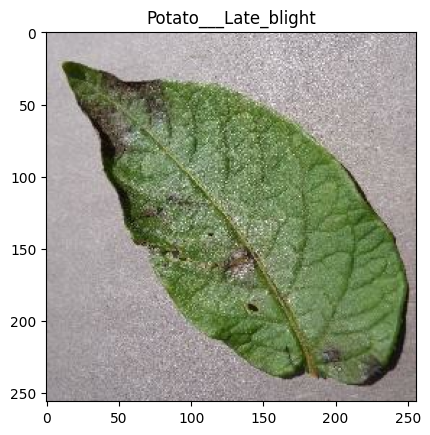

In [ ]:
# visualizing image : plt.imshow() expect a 3D array
for image_batch, label_batch in dataset.take(1):
  # plt.imshow(image_batch[0].numpy())
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  # plt.axis("off")
  # plt.title(label_batch[0])
  plt.title(class_names[label_batch[0]])

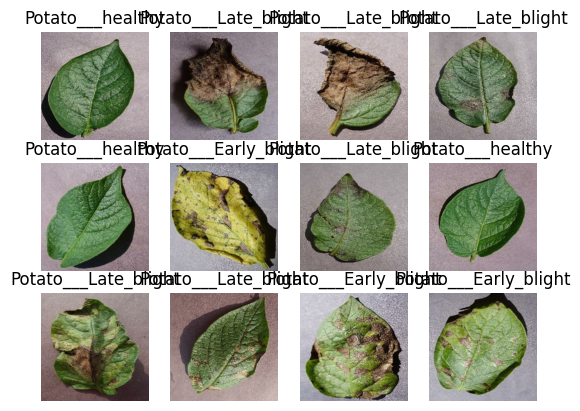

In [ ]:
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])

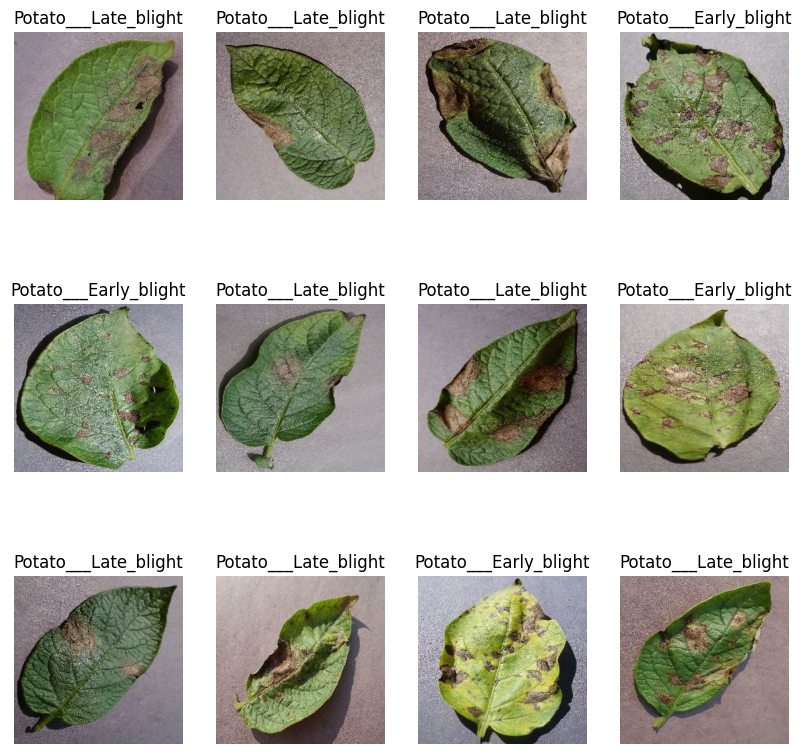

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[i]])

In [ ]:
len(dataset) # 68 , but actual length is 32*68 , because each of the 68 elements are 32 batch

68

spliting the dataset in 80% training and 20% testing( 10 = validation, 10 = test)

10% validation ke bad 10% testing me use krenge to measure the accuracy of the model

In [ ]:
EPOCHS = 50

In [ ]:
# sklearn jaisa traintest tf me nhi hai

In [ ]:
# upar shuffle ho chuka hai

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54) # first 54 batches ko le liya in training me like arr[:54]
len(train_ds)

54

In [ ]:
test_plus_val_ds = dataset.skip(54) # 55 se 68 tk ke batches in test
len(test_plus_val_ds)

14

In [ ]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_data = test_plus_val_ds.take(6)
len(val_data)

6

In [ ]:
test_ds = test_plus_val_ds.skip(6)
len(test_ds)

8

Doing everything in one function

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle = True, shuffle_size = 10000):
  ds_size = len(ds)

  if shuffle: # train test split ke pahle shuffling
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)
  test_plus_val_ds = ds.skip(train_size)

  val_ds = test_plus_val_ds.take(val_size)
  test_ds = test_plus_val_ds.skip(val_size)

  return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset) # baki sare parameters default jo set kiye hain use ho jayenge

In [ ]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


**Cache, Shuffle, and Prefetch the Dataset**

Dataset optimization for training process

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

It looks like you are working with TensorFlow's `tf.data.Dataset` and applying some common techniques for optimizing performance during data loading and preprocessing. Let me explain each step:

1. **`cache()` method:**
   - The `cache()` method caches elements of the dataset in memory after they are loaded for the first time. This can significantly speed up the training process, especially when dealing with large datasets that don't fit into memory.

2. **`shuffle(1000)` method:**
   - The `shuffle()` method shuffles the elements of the dataset. In this case, it shuffles the data with a buffer size of 1000. A larger buffer size can lead to a more uniform shuffling, but it requires more memory.

3. **`prefetch(buffer_size=tf.data.AUTOTUNE)` method:**
   - The `prefetch()` method is used to asynchronously fetch batches of data from the dataset while the model is training on the current batch. This helps to overlap the data loading and model training, improving overall efficiency.
   - The `buffer_size=tf.data.AUTOTUNE` parameter allows TensorFlow to dynamically adjust the prefetch buffer size based on available system resources. This can help optimize performance.

In summary, these lines of code are preparing training (`train_ds`), validation (`val_ds`), and test (`test_ds`) datasets for efficient processing during model training. Caching, shuffling, and prefetching are common practices to enhance the performance of training pipelines in TensorFlow.

un 2 images ko yad kro :

prefatch = CPU AND GPU ko sath sath chalana : loading data by cpu at the time the previously loaded data is being trained on gpu.

cache = ek bar image load ho gyi to memory ke cache me store krke rkhe rho, each next epochs me use images from cache, don't need to load again and again.

**BUILDING THE MODEL**


Creating a Layer for Resizing and Normalization

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 255). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it.


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])


**Data Augmentation**

Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data. Ek image se kai new images banana = contrast, rotation etc dvara to increase training sample to make model robust


In [ ]:
data_argumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         


Compiling the Model

We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 8s 148ms/step - loss: 0.9042 - accuracy: 0.4682 - val_loss: 0.9020 - val_accuracy: 0.4271
Epoch 2/50
54/54 [==============================] - 3s 59ms/step - loss: 0.8191 - accuracy: 0.5920 - val_loss: 0.6654 - val_accuracy: 0.7500
Epoch 3/50
54/54 [==============================] - 3s 60ms/step - loss: 0.6030 - accuracy: 0.7569 - val_loss: 0.5289 - val_accuracy: 0.7812
Epoch 4/50
54/54 [==============================] - 3s 60ms/step - loss: 0.4681 - accuracy: 0.8032 - val_loss: 0.4454 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 3s 62ms/step - loss: 0.3752 - accuracy: 0.8565 - val_loss: 0.2454 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 3s 60ms/step - loss: 0.3016 - accuracy: 0.8883 - val_loss: 0.5076 - val_accuracy: 0.7865
Epoch 7/50
54/54 [==============================] - 3s 59ms/step - loss: 0.1879 - accuracy: 0.9201 - val_loss: 0.0734 - val_accuracy: 0.9740
Epoch 8/50
5

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 26ms/step - loss: 8.4641e-06 - accuracy: 1.0000


You can see above that we get 99.22% accuracy for our test dataset. This is considered to be a pretty good accuracy

In [ ]:
scores # loss, accuracy

[8.464110578643158e-06, 1.0]

In [ ]:
history

History me loss, accuracy, val_loss, val_accuracy: in charon ki 50-50 values as a list store hain

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.46817129850387573,
 0.5920138955116272,
 0.7569444179534912,
 0.8032407164573669,
 0.8564814925193787,
 0.8883101940155029,
 0.9201388955116272,
 0.9039351940155029,
 0.9571759104728699,
 0.9751157164573669,
 0.9878472089767456,
 0.9890046119689941,
 0.9589120149612427,
 0.9716435074806213,
 0.9924768805503845,
 0.9907407164573669,
 0.9907407164573669,
 0.9733796119689941,
 0.9594907164573669,
 0.9988425970077515,
 0.9982638955116272,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Plotting them nicely , but first storing all those values

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation accuracy wrt EPOCHS')

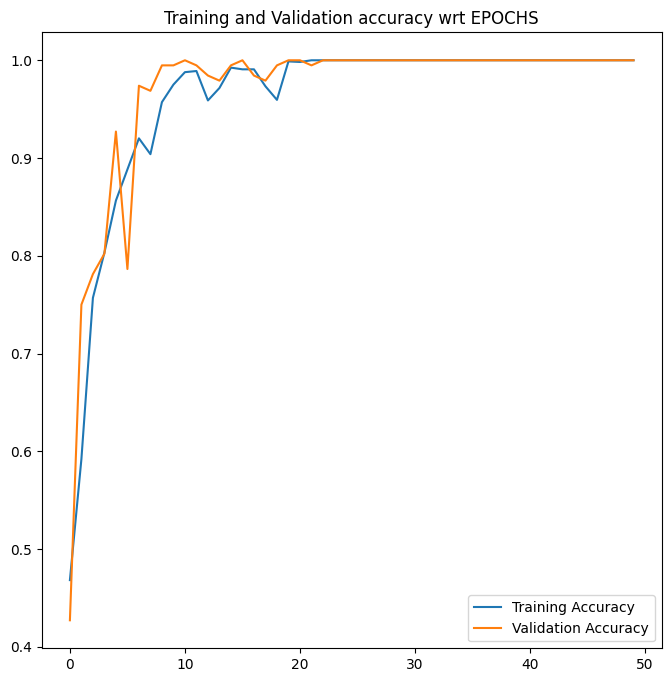

In [ ]:
plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy wrt EPOCHS")
# this graph shows that don't need to run more than 20 epochs

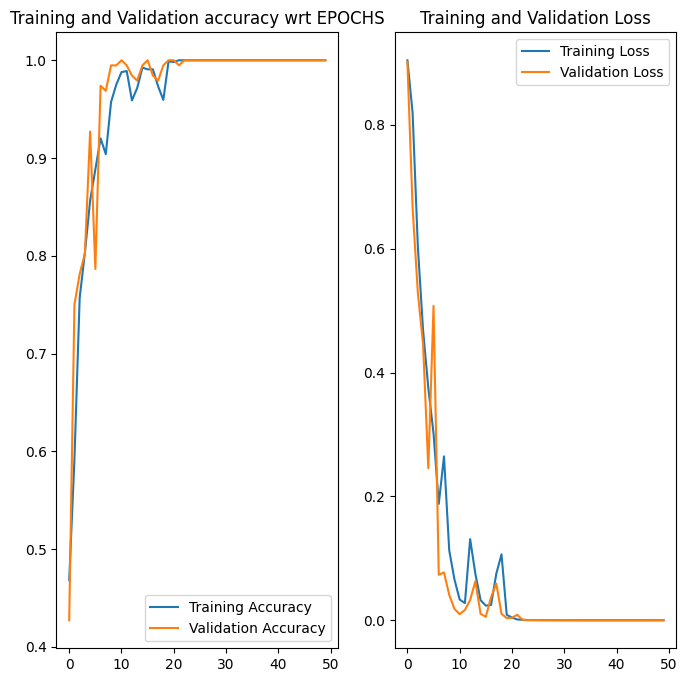

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1) # 1 row, 2 column me 1st
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title("Training and Validation accuracy wrt EPOCHS")

plt.subplot(1,2,2) # 1 row , 2 column me 2nd
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
# clearly after 20 epochs, accuracy = 100% and loss is 0

So far it looks good. Now I want to make a prediction. Just 1 batch ( 32 images) pr prediction

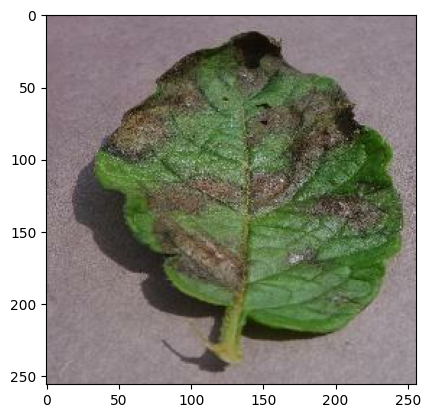

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  plt.imshow(images_batch[0].numpy().astype('uint8'))

first image to predict
first_image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 141ms/step
[1.0838126e-10 1.0000000e+00 4.2079604e-10]
[1.0838126e-10 1.0000000e+00 4.2079604e-10]
Predicted label Potato___Late_blight


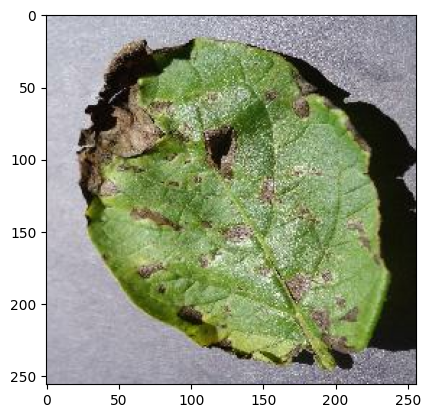

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0]

  print("first image to predict")
  plt.imshow(first_image)
  print("first_image's actual label:",class_names[first_label])

  # predicted label
  batch_prediction = model.predict(image_batch)
  print(batch_prediction[0])

  print(batch_prediction[0]) #softmax probability dega, max prob will be the ans
  import numpy as np
  print("Predicted label",class_names[np.argmax(batch_prediction[0])])

Awesome performance every time

In [ ]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0) # create a batch

  predictions = model.predict(img_array)
  prediction_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])), 2)
  return prediction_class, confidence

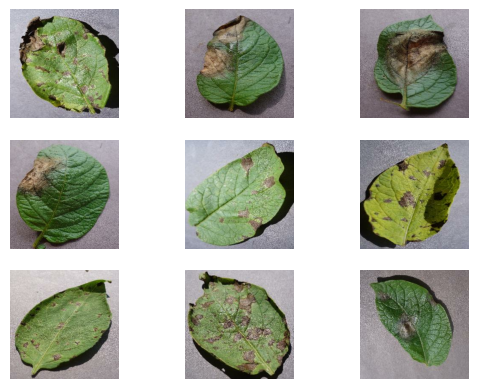

In [ ]:
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


1/1 [==============================] - 0s 21ms/step


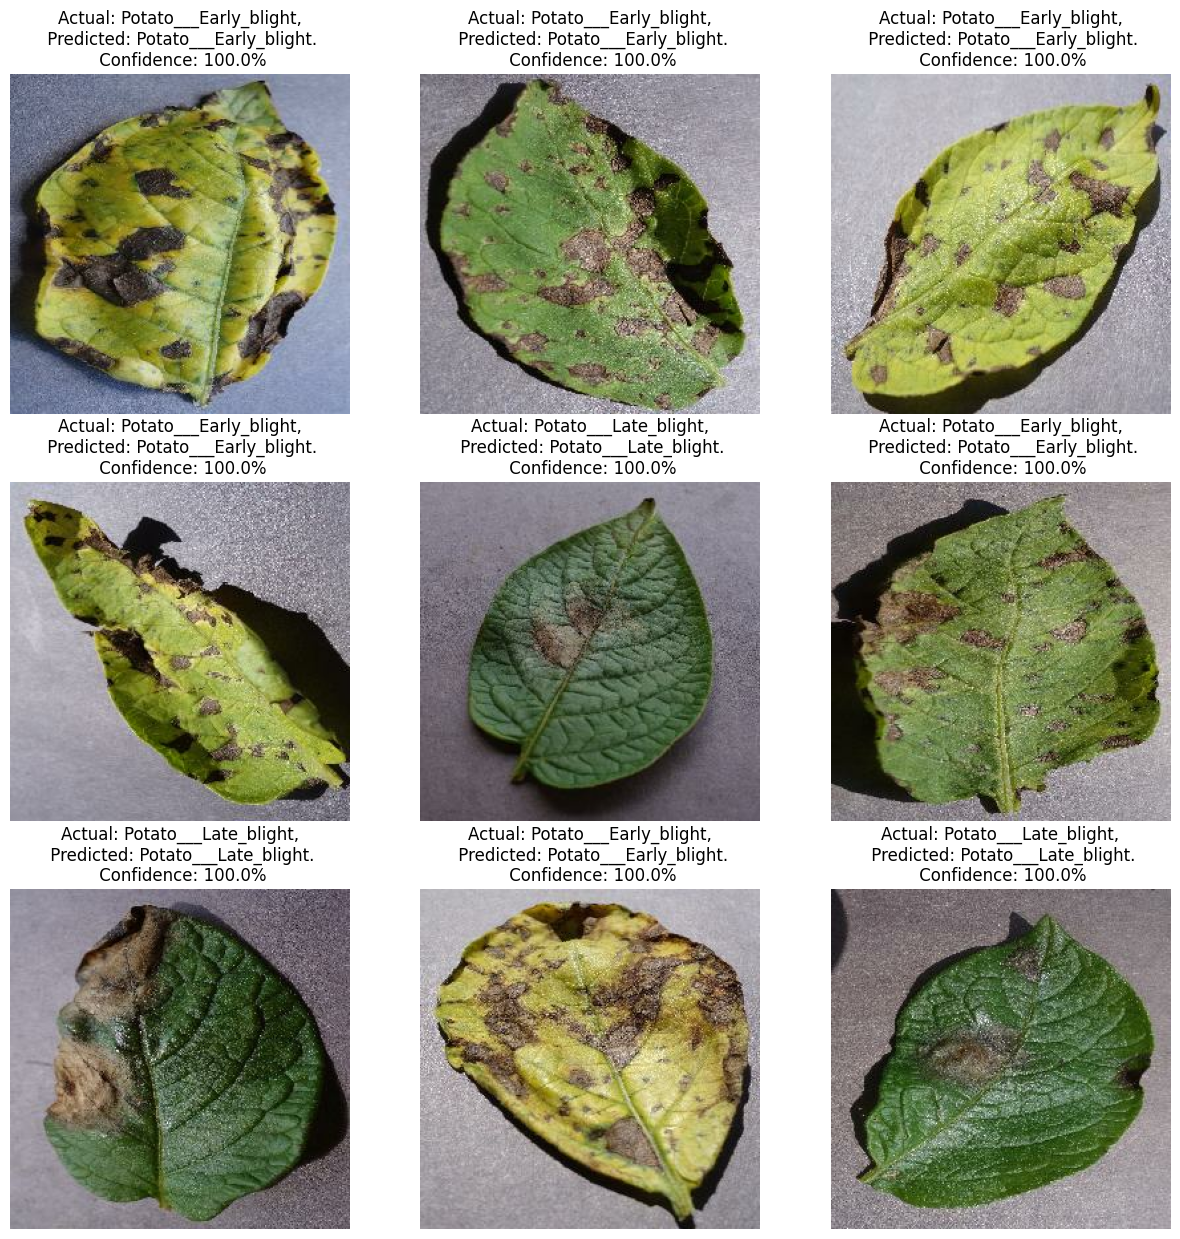

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")



Saving the Model

We append the model to the list of models as a new version


In [ ]:
# Specify the model version
model_version = 1

# Save the model to Google Drive
model.save(f"/content/drive/MyDrive/models/{model_version}")  # directory ka name hi 1,2,3 kr diya, model_1, model_2 krne se bad me automation me string to integer me badlne me dikkat hoti

In [ ]:
# Specify the model version
model_version = 2 # use if do some changes and then save the model's new version

# Save the model to Google Drive
model.save(f"/content/drive/MyDrive/models/{model_version}")

In [ ]:
# automate the process
import os
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
os.listdir("drive/")

['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0']

In [ ]:
os.listdir("drive/MyDrive")

['Colab Notebooks', 'potato_disease_project', 'models']

In [ ]:
os.listdir("drive/MyDrive/models/")

['1', '2']

In [ ]:
[int(i) for i in os.listdir("drive/MyDrive/models/") ] # string to integer conversion, only numbered directories pr possible

[1, 2]

Finally automate krne ka code

In [ ]:
import os
model_version = max([int(i) for i in os.listdir("drive/MyDrive/models/")+[0]])+1
model.save(f"drive/MyDrive/models/{model_version}")